In [ ]:
# Library used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Import School Partitipations Rate
path = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/School_Partitipation_Rates/Angka%20Partisipasi%20Sekolah.xlsx"
df = pd.read_excel(path)
display(df.head())


,Province,7-12,13-15,16-18,19-24
0,Aceh,99.75,98.52,83.26,32.54
1,Sumatera Utara,99.41,96.89,77.67,25.75
2,Sumatera Barat,99.52,96.23,83.63,35.66
3,Riau,99.36,95.37,77.29,28.16
4,Jambi,99.70,96.42,71.97,23.32


In [ ]:
# Import GeoJSON Data
path = 'https://raw.githubusercontent.com/arifadli/DatasetRepository/main/School_Partitipation_Rates/gadm36_IDN_1.json'
df_geo = gpd.read_file(path)
display(df_geo.head())

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


In [ ]:
df_join = df_geo.merge(df, how='inner', left_on="NAME_1", right_on="Province")
df_join = df_join[['Province','7-12', '13-15', '16-18', '19-24','geometry']]
df_join.head()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-16-6f71dc78db0e>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


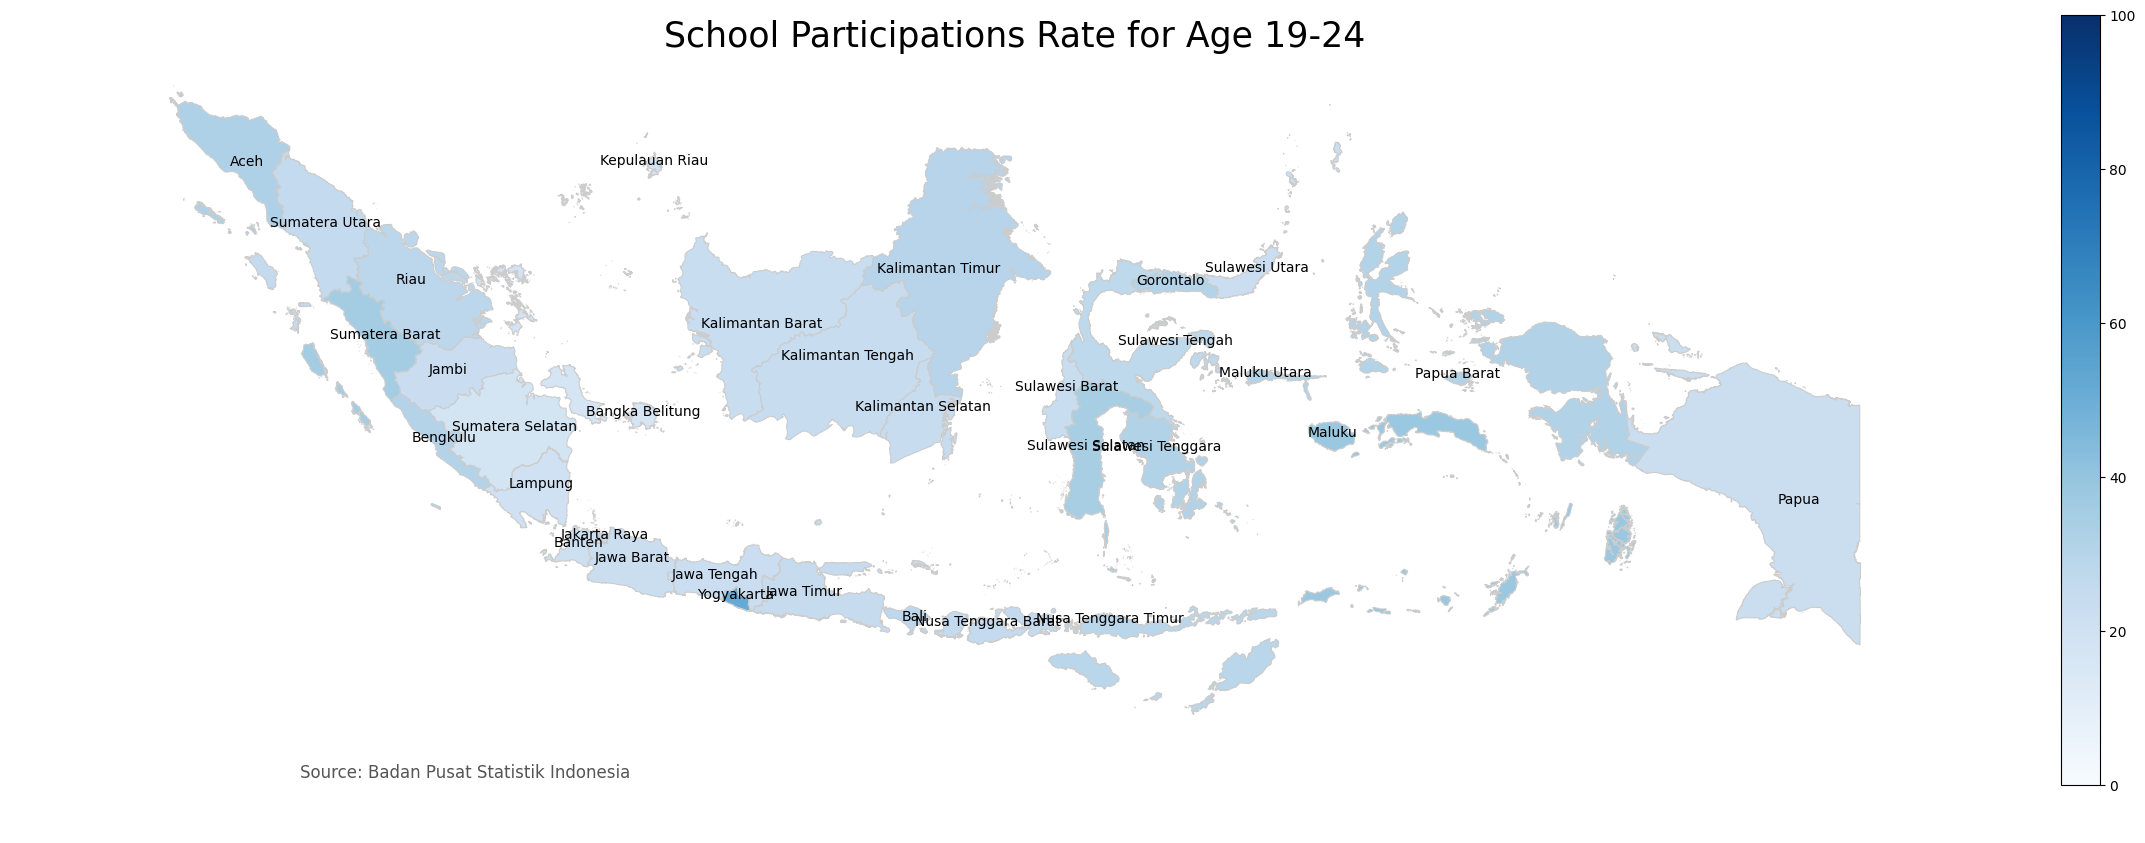

In [16]:
# set a variable that will call whatever column we want to visualise on the map
values = '19-24'
# set the value range for the choropleth
vmin, vmax = 0,100
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title
title = 'School Participations Rate for Age {}'.format(values)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm)
# create map
df_join.plot(column=values, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))
for idx, row in df_join.iterrows():
    plt.annotate(text=row['Province'], xy=row['coords'], horizontalalignment='center')


<ipython-input-17-9c5d55a78265>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


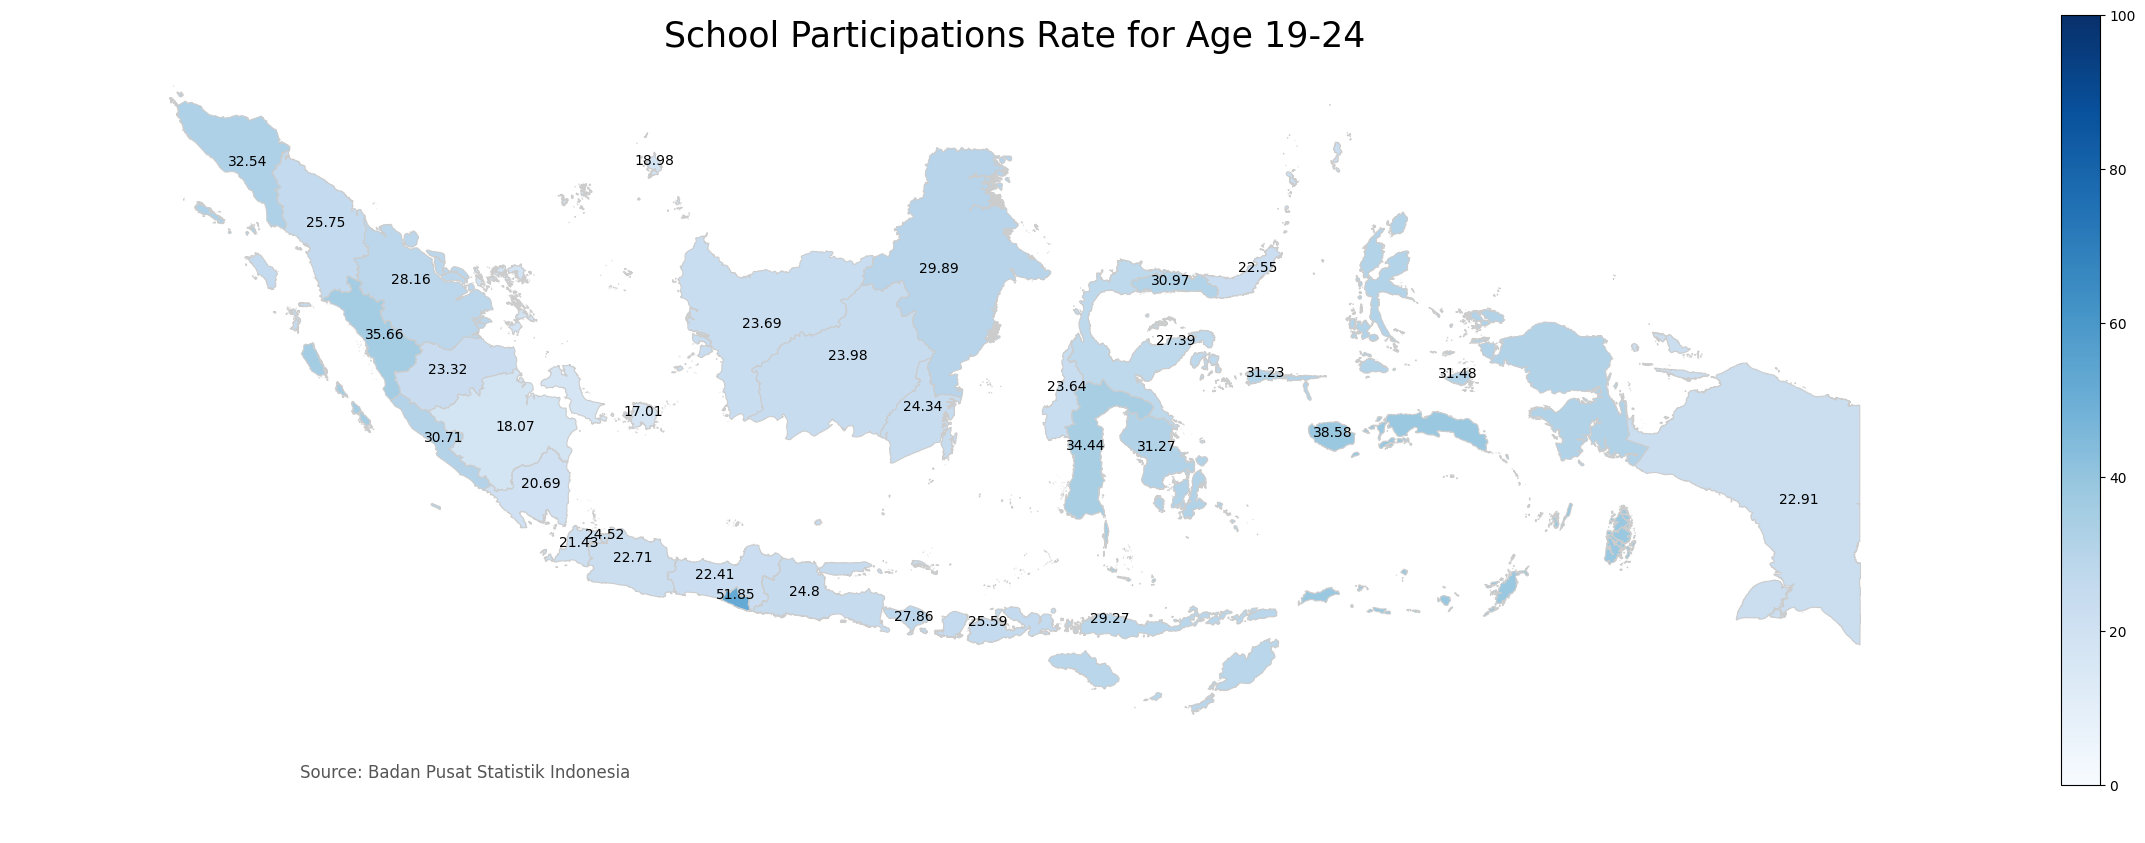

In [17]:
# set a variable that will call whatever column we want to visualise on the map
values = '19-24'
# set the value range for the choropleth
vmin, vmax = 0,100
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title
title = 'School Participations Rate for Age {}'.format(values)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add the colorbar to the figure
cbar = fig.colorbar(sm)
# create map
df_join.plot(column=values, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))
for idx, row in df_join.iterrows():
    plt.annotate(text=row['19-24'], xy=row['coords'], horizontalalignment='center')
